<a href="https://colab.research.google.com/github/LizaMoeun/mental-health-analysis-Cambodia/blob/main/mental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mental Health Analysis in Cambodia Using Machice Learning

In [8]:
# Importing libraries for data manipulation
import pandas as pd
import numpy as np

# For data transformation
from scipy.stats import zscore

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Importing machine learning algorithm
from sklearn.ensemble import RandomForestClassifier

# For model evaluation
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report


In [9]:
# Load the mental health dataset
url = "https://raw.githubusercontent.com/LizaMoeun/mental-health-analysis-Cambodia/main/mental_health_cambodia_dataset.csv"
mental_data = pd.read_csv(url)

# Displaying the first few records
print("First 5 records:")
print(mental_data.head())

First 5 records:
   ID  Age  Gender Location   Education Employment Income_Level Trauma  \
0   1   49   Other    Rural     Primary     Farmer       Medium    Yes   
1   2   49  Female    Rural   Secondary    Student       Medium    Yes   
2   3   54    Male    Urban   Secondary   Employed       Medium     No   
3   4   47  Female    Rural  University    Student          Low     No   
4   5   37   Other    Rural         NaN     Farmer         High    Yes   

  Access_to_Care  Anxiety  Depression  PTSD Social_Support  Risk  
0             No        1           1     0           High     1  
1            Yes        0           1     1           High     1  
2            Yes        1           1     1            Low     1  
3             No        0           0     1           High     0  
4            Yes        1           0     0            Low     0  


In [10]:
# data info
mental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              100 non-null    int64 
 1   Age             100 non-null    int64 
 2   Gender          100 non-null    object
 3   Location        100 non-null    object
 4   Education       77 non-null     object
 5   Employment      100 non-null    object
 6   Income_Level    100 non-null    object
 7   Trauma          100 non-null    object
 8   Access_to_Care  100 non-null    object
 9   Anxiety         100 non-null    int64 
 10  Depression      100 non-null    int64 
 11  PTSD            100 non-null    int64 
 12  Social_Support  100 non-null    object
 13  Risk            100 non-null    int64 
dtypes: int64(6), object(8)
memory usage: 11.1+ KB


In [11]:
# Descriptive statistics
mental_data.describe().round(2)

,ID,Age,Anxiety,Depression,PTSD,Risk
count,100.00,100.00,100.00,100.00,100.00,100.00
mean,50.50,37.81,0.52,0.55,0.51,0.66
std,29.01,12.63,0.50,0.50,0.50,0.48
min,1.00,18.00,0.00,0.00,0.00,0.00
25%,25.75,26.00,0.00,0.00,0.00,0.00
50%,50.50,38.00,1.00,1.00,1.00,1.00
75%,75.25,48.00,1.00,1.00,1.00,1.00
max,100.00,60.00,1.00,1.00,1.00,1.00


In [12]:
# Counting class distribution
class_counts = mental_data['Risk'].value_counts()
print("\nClass Counts:")
print(class_counts)

# Percentages
class_percent = (class_counts / len(mental_data)) * 100
print("\nClass Percentages:")
print(class_percent)



Class Counts:
Risk
1    66
0    34
Name: count, dtype: int64

Class Percentages:
Risk
1    66.0
0    34.0
Name: count, dtype: float64


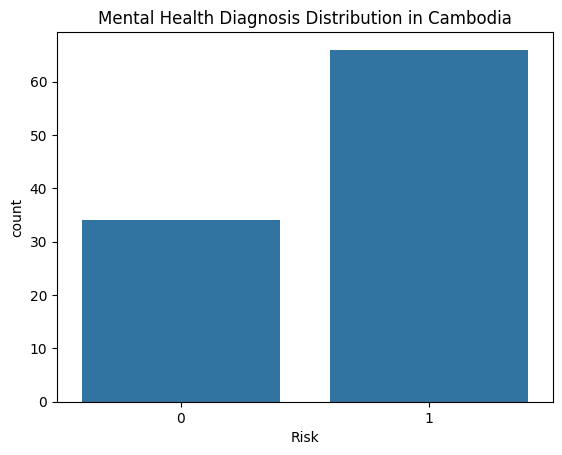

In [13]:
#Class distribution
sns.countplot(data=mental_data, x='Risk')
plt.title("Mental Health Diagnosis Distribution in Cambodia")
plt.show()

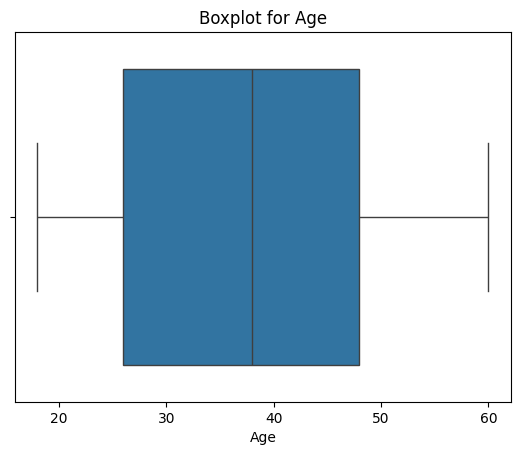

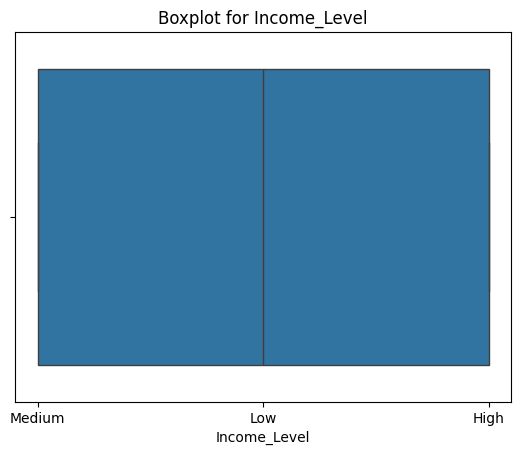

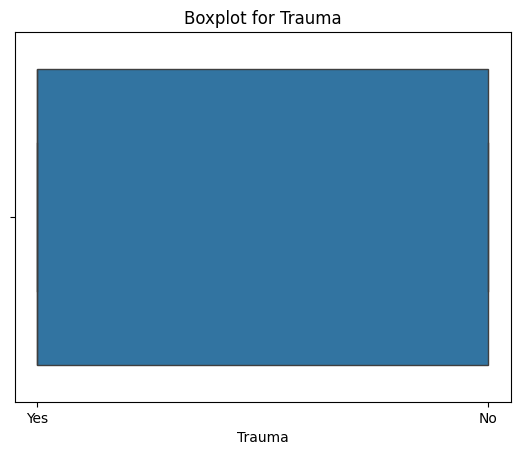

In [14]:
# Boxplot for selected features
features = ['Age', 'Income_Level', 'Trauma']
for feature in features:
    sns.boxplot(data=mental_data, x=feature)
    plt.title(f"Boxplot for {feature}")
    plt.show()

In [15]:
#Drop missing values
mental_data.dropna(inplace=True)

# Drop ID (not useful)
mental_data = mental_data.drop(columns=['ID'], errors='ignore')

#Separte features and target
X = mental_data.drop(columns=['Risk'])
y = mental_data['Risk']

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X)

#Standardize numeric features
X_scaled = X_encoded.apply(zscore)

print("\nStandardized features:")
print(X_scaled.head())



Standardized features:
        Age   Anxiety  Depression      PTSD  Gender_Female  Gender_Male  \
0  0.896116  0.866025    0.937043 -1.039750      -0.693375    -0.672927   
1  0.896116 -1.154701    0.937043  0.961769       1.442221    -0.672927   
2  1.294045  0.866025    0.937043  0.961769      -0.693375     1.486046   
3  0.736944 -1.154701   -1.067187  0.961769       1.442221    -0.672927   
5 -0.854772 -1.154701    0.937043  0.961769      -0.693375    -0.672927   

   Gender_Other  Location_Rural  Location_Urban  Education_Primary  ...  \
0      1.322876        1.095445       -1.095445           1.532262  ...   
1     -0.755929        1.095445       -1.095445          -0.652630  ...   
2     -0.755929       -0.912871        0.912871          -0.652630  ...   
3     -0.755929        1.095445       -1.095445          -0.652630  ...   
5      1.322876       -0.912871        0.912871          -0.652630  ...   

   Income_Level_High  Income_Level_Low  Income_Level_Medium  Trauma_No  \


In [16]:
#Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression

# Initialize the instance of the algorithm
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Use the instance to train the model
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Making predictions on the test set
test_predictions = logistic_model.predict(X_test)

# Computing and printing the performance metrics
print("Accuracy:", accuracy_score(y_test, test_predictions))
print("Precision:", precision_score(y_test, test_predictions, average='weighted'))
print("Recall:", recall_score(y_test, test_predictions, average='weighted'))
print("F1 Score:", f1_score(y_test, test_predictions, average='weighted'))

Accuracy: 0.875
Precision: 0.875
Recall: 0.875
F1 Score: 0.875


<Figure size 800x600 with 0 Axes>

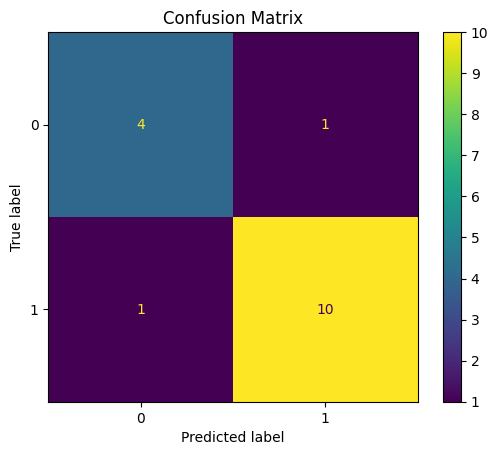

In [22]:
# Visualizing the confusion matrix
from sklearn.metrics import confusion_matrix # Import confusion_matrix here
cm = confusion_matrix(y_test, test_predictions, labels=logistic_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
plt.figure(figsize=(8, 6))
disp.plot()
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

In [23]:
import joblib

# Saving the trained logistic regression model
joblib.dump(logistic_model, 'mental_health_logistic_model.joblib')


['mental_health_logistic_model.joblib']

In [30]:
import numpy as np
import joblib
import pandas as pd # Import pandas

# Load the model
loaded_model = joblib.load('mental_health_logistic_model.joblib')

# Calculate means and stds from training data (assuming X_train and X_encoded are available from previous cells)
feature_means = X_encoded.mean() # Use X_encoded for means/stds as standardization was applied to it
feature_stds = X_encoded.std()

# Define new unseen data (must match original columns before encoding)
# You need to define the column names corresponding to your input features.
# Based on your earlier code, the original columns likely were something like:
# ['Age', 'Anxiety', 'Depression', 'OCD', 'PTSD', 'Income_Level', 'Gender', 'Education', 'Relationship_Status', 'Coping_Style', 'Social_Support', 'Trauma', 'Treatment_History']
# Let's create a DataFrame with these columns.
new_data_dict = {
    'Age': [24],
    'Anxiety': [1],
    'Depression': [2],
    'OCD': [3],
    'PTSD': [1],
    'Income_Level': [120],
    'Gender': [3], # Assuming 3 corresponds to a category
    'Education': [1], # Assuming 1 corresponds to a category
    'Relationship_Status': [4], # Assuming 4 corresponds to a category
    'Coping_Style': [3], # Assuming 3 corresponds to a category
    'Social_Support': [2], # Assuming 2 corresponds to a category
    'Trauma': [3], # Assuming 3 corresponds to a category
    'Treatment_History': [2] # Assuming 2 corresponds to a category
}

new_data_df = pd.DataFrame(new_data_dict)

# One-hot encode new data, ensuring columns match X_encoded
# Using reindex with fill_value=0 ensures all columns from X_encoded are present
# and new columns not in X_encoded are dropped (or handled if needed, but fill_value=0 is common)
new_data_encoded = pd.get_dummies(new_data_df).reindex(columns=X_encoded.columns, fill_value=0)


# Standardize using training stats
# Convert new_data_encoded to numpy array if feature_means/stds are numpy arrays,
# or ensure consistent types. Assuming feature_means/stds are pandas Series.
standardized_new_data = (new_data_encoded - feature_means) / feature_stds

# Reshape for prediction (This reshape is often not needed if it's already a single sample DataFrame/Series)
# Let's check the shape first. pd.get_dummies on a single row DF results in a single row DF.
# The model expects shape (n_samples, n_features).
# standardized_new_data is already (1, num_features).
# reshaped_new_data = standardized_new_data.reshape(1, -1) # This line might be unnecessary

# Make prediction
prediction = loaded_model.predict(standardized_new_data) # Use the standardized DataFrame directly

print("\nPrediction on New Data:")
print("The new data is predicted as class:", prediction[0])


Prediction on New Data:
The new data is predicted as class: 1
